In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from matplotlib.ticker import FuncFormatter

from tmp.utils import formatter

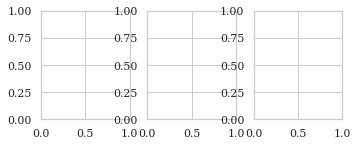

In [7]:
form = FuncFormatter(formatter)

plt.rc('font', family='serif')
plt.rc('text', usetex=False)
sns.set(style="whitegrid", font="serif")
color_mine = ["#F8414A", "#5676A1", "#FD878D", "#385A89",  "#FFFACD", "#EFCC00"]

df = pd.read_csv("../data/users_neighborhood_anon.csv")

df["followers_followees"] = df["followers_count"] / (df["followees_count"])
df["number_urls"] = df["number urls"] / (df["tweet number"] + df["retweet number"] + df["quote number"])
df["number hashtags"] = df["number hashtags"] / (df["tweet number"] + df["retweet number"] + df["quote number"])

f, axzs = plt.subplots(1, 3, figsize=(5.4, 2))
boxprops = dict(linewidth=0.3)
whiskerprops = dict(linewidth=0.3)
capprops = dict(linewidth=0.3)
medianprops = dict(linewidth=1)

In [8]:
attributes_all = [
    ["followers_followees", "number_urls", "number hashtags"]]

titles_all = [
    ["\#followers/followees", "\#URLs/tweet", "hashtags/tweet"]]


for axs, attributes, titles in zip([axzs], attributes_all, titles_all):

    for axis, attribute, title in zip(axs, attributes, titles):
        men = [df[df.hate == "hateful"],
               df[df.hate == "normal"],
               df[df.hate_neigh],
               df[df.normal_neigh],
               df[df.is_63_2 == True],
               df[df.is_63_2 == False]]

        tmp = []
        medians, medians_ci = [], []
        averages, averages_ci = [], []

        for category in men:

            w_inf = category[attribute].values
            non_inf = w_inf[w_inf < 1E308]
            tmp.append(non_inf)

        _, n_h = stats.ttest_ind(tmp[0], tmp[1], equal_var=False, nan_policy='omit')
        _, nn_nh = stats.ttest_ind(tmp[2], tmp[3], equal_var=False, nan_policy='omit')
        _, ns_ns2 = stats.ttest_ind(tmp[4], tmp[5], equal_var=False, nan_policy='omit')

        print(title)
        print(n_h)
        print(nn_nh)
        print(ns_ns2)

        rects = sns.boxplot(data=tmp, palette=color_mine, showfliers=False, ax=axis, orient="v", width=0.8,
                            boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops)

        axis.yaxis.set_major_formatter(form)

        axis.set_xticks([])
        axis.set_title(title)
        axis.set_ylabel("")
        axis.set_xlabel("")
        axis.axvline(1.5, ls='dashed', linewidth=0.3, color="#C0C0C0")
        axis.axvline(3.5, ls='dashed', linewidth=0.3, color="#C0C0C0")


f.tight_layout(rect=[0, 0, 1, 1])

f.savefig("results/spam.pdf")

C:\Users\uditi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in less


\#followers/followees
0.003761403168981752
0.05793447228613198
0.13778264780176858


C:\Users\uditi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in less


\#URLs/tweet
2.6489075853321047e-12
4.076610009176103e-55
1.784100806177049e-44


C:\Users\uditi\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in less


hashtags/tweet
1.330042960472912e-23
5.4597219753975935e-18
1.340751737584485e-17
